<a href="https://colab.research.google.com/github/luca-g97/Master-Thesis/blob/main/GPT2_(Proof_of_Concept).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**It´s totally normal that the notebook crashes the first time being started, just hit run all again and everything should work**

#Initialization: Imports and Dependencies

In [ ]:
# @title Check for Runtime-Location { display-mode: "form" }
!export TF_ENABLE_ONEDNN_OPTS=0

# Suppress FutureWarning globally
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Check for local host time. If locally hosted, make sure all dependencies are generated
runningLocal = False if 'google.colab' in str(get_ipython()) else True
print("Running locally" if runningLocal else "Running in Colab")

# if(runningLocal):
import sys
import site

# Add the user site-packages directory to the Python path (for local usage especially)
site.addsitedir('/tf/.local/lib/python3.11/site-packages')

Running in Colab


**If the notebook is run via Colab, download all necessary files from Github if they aren´t downloaded yet. If you run it locally, please provide them yourself to be able to change them at runtime. We recommend using the following docker image for this: https://hub.docker.com/r/lucag97/colab-server**

In [ ]:
#@title Download of Module-Scripts { display-mode: "form" }

import os

# Define the files and directories you expect to be present
expected_files = ['Customizable_RENN.py','Images_HSVRGB.py','Images_MNIST.py','LLM_Small1x1.py', 'LLM_GPT2.py', 'LLM_LSTM.py', 'Widgets.py', 'Datasets']

# Check for each expected file and directory
def checkIfAllFilesArePresent(expected_files):
    for item in expected_files:
        #path = os.path.join("/content/", item)
        path = os.path.join("./", item)
        if not os.path.exists(path):
            print(f'Missing: {path}')
            return False
    return True

#If not locally running and not all files are present
if not ((checkIfAllFilesArePresent(expected_files)) and runningLocal):
    #!rm -rf /content/*
    !rm -rf ./*
    #Requesting the relevant files from Github
    #!git clone "https://github.com/luca-g97/Master-Thesis.git" /content/Interactive-AI-Playground
    !git clone "https://github.com/luca-g97/Master-Thesis.git" ./Interactive-AI-Playground

    #Move the files into the content folder and delete the original folder afterwards
    #!mv /content/Interactive-AI-Playground/Google_Colab-Interactive_AI_Playground/* /content/
    !mv ./Interactive-AI-Playground/Google_Colab-Interactive_AI_Playground/* ./
    #!rm -rf /content/Interactive-AI-Playground/
    !rm -rf ./Interactive-AI-Playground/

Cloning into './Interactive-AI-Playground'...
remote: Enumerating objects: 1694, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 1694 (delta 84), reused 61 (delta 31), pack-reused 1560 (from 2)
Receiving objects: 100% (1694/1694), 18.21 MiB | 4.07 MiB/s, done.
Resolving deltas: 100% (1125/1125), done.


**If something doesn´t work please uncomment the block below and install the specific versions - those were the ones we last tested with.**

In [ ]:
# @title Fixed Version Import { display-mode: "form" }

!python3 -m pip install -q --upgrade pip

# # Install specific versions of the libraries
# !pip install -q torch==2.4.1
# !pip install -q keras==3.4.1
# !pip install -q tqdm==4.66.5
# !pip install -q plotly==5.24.1
# !pip install -q ipython==7.34.0

In [ ]:
# @title Import of Dependencies { display-mode: "form" }

import timeit
import time

#Libraries related to Torch
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F

#Libraries needed for MNIST dataset
from tqdm import tqdm
from keras.datasets import mnist
from keras.utils import to_categorical
!pip install -q optuna
import optuna

#Libraries needed for RENN
!pip install -q python-Levenshtein
from Levenshtein import distance as levenshtein
!pip install -q cma
import cma

#Libraries needed for HSV-RGB
import colorsys

#Libraries needed for LLM dataset
!pip install -q lorem==0.1.1
!pip install -q tiktoken==0.8.0
#!pip install -q numpy==1.26.4 scipy spacy
#!python -m spacy download en_core_web_sm -q
#import spacy
import lorem
import tiktoken
import random
from transformers import GPT2Tokenizer
#!pip install -q datasets
#from datasets import load_dataset
!pip install -q stanza
import stanza
# Suppress logging from stanza
nlp = stanza.Pipeline('en', verbose=False)
stanza.download('en', verbose=False)

if runningLocal:
    import sys
    from subprocess import run
    sys.path.append('/tf/.local/lib/python3.11/site-packages')
    run([sys.executable, "-m", "pip", "install", "--upgrade", "pip"], check=True)
    run([sys.executable, "-m", "pip", "install", "-q", "nltk"], check=True)

import nltk
nltk.download('punkt_tab')
from nltk import word_tokenize, sent_tokenize

#Library needed for correct displaying widgets in Google Colab
!pip install -q ipywidgets==7.7.1

#Libraries needed for Visualization
!pip install -q plotly
from IPython.display import display, clear_output
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'colab'

#Libraries needed for Zipping
import io
import pandas as pd
!pip install -q pyarrow
import pyarrow as pa
!pip install -q pyarrow-parquet
import pyarrow.parquet as pq
!pip install -q zstandard
import zstandard as zstd

#Set the correct device. Prefer a graphics card (cuda) if possible
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print("Using device type: ", device)

!pip install -q -U datasets huggingface_hub fsspec pyarrow pyarrow-parquet zstandard scikit-learn
!pip install -q lorem==0.1.1 tiktoken==0.8.0 stanza
!apt-get install -y build-essential cmake liblz4-dev > /dev/null 2>&1
!git clone https://github.com/LLNL/zfp.git > /dev/null 2>&1
!cd zfp && mkdir -p build && cd build && cmake .. > /dev/null 2>&1 && make -j > /dev/null 2>&1 && sudo make install > /dev/null 2>&1
!python3 -m pip install -q lz4 zfpy

import numpy as np
import lzma
import zfpy
import scipy.sparse as sp
import joblib
from functools import partial
from tqdm.auto import tqdm
from sklearn.decomposition import IncrementalPCA
import matplotlib.pyplot as plt
import seaborn as sns
import re

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


ERROR: Could not find a version that satisfies the requirement pyarrow-parquet (from versions: none)
ERROR: No matching distribution found for pyarrow-parquet
Using device type:  cpu
ERROR: Could not find a version that satisfies the requirement pyarrow-parquet (from versions: none)
ERROR: No matching distribution found for pyarrow-parquet


In [ ]:
# @title GPT2-Model Initialization { display-mode: "form" }
import LLM_GPT2 as GPT2
GPT2.initializePackages(random, lorem, device, tiktoken, DataLoader, nlp, GPT2Tokenizer, nltk)
gpt2train, gpt2test = GPT2.createWikiText2TrainSet()

Created a train set with 77611 sentences


In [ ]:
# @title Initialization  { display-mode: "form" }

layerAmount = 2
learning_rate = 0.0004
epochs = 10
seed = 0

train_samples = 72
test_samples = 72
batch_size_training = 32
batch_size_test = 32
loss_function = "MSE"
optimizer = "Adam"
eval_samples = 10

LLM_Layers, TransformerBlockLayer = GPT2.setGPTSettings(layerAmount, learning_rate, epochs)

hidden_sizes = []
hidden_sizes.append(LLM_Layers[0])
for _ in range(layerAmount):
    hidden_sizes.append(TransformerBlockLayer)
hidden_sizes.append(LLM_Layers[1])
hidden_sizes = [item for sublist in hidden_sizes for item in sublist]

# Training

In [ ]:
# @title Training the Model { display-mode: "form" }
GPT2.initializeDatasets(train_samples, test_samples, eval_samples, batch_size_training, batch_size_test, seed)
GPT2.trainModel(hidden_sizes, loss_function, optimizer, learning_rate, epochs)

Setting seed number to  0
Created all dataloaders
Model initialized, Starting training
Epoch 1: Train-Loss 5.5603, Train-Perplexity 259.9098, Validation-Loss 8.2898, Test-Perplexity 3982.9721,
Epoch 2: Train-Loss 4.3385, Train-Perplexity 76.5948, Validation-Loss 8.9141, Test-Perplexity 7436.0120,
Epoch 3: Train-Loss 3.3833, Train-Perplexity 29.4682, Validation-Loss 8.8087, Test-Perplexity 6692.2328,
Epoch 4: Train-Loss 2.3520, Train-Perplexity 10.5065, Validation-Loss 9.1154, Test-Perplexity 9094.2432,
Epoch 5: Train-Loss 1.4468, Train-Perplexity 4.2496, Validation-Loss 9.2104, Test-Perplexity 10001.0389,
Epoch 6: Train-Loss 1.0120, Train-Perplexity 2.7511, Validation-Loss 9.3504, Test-Perplexity 11503.9677,
Epoch 7: Train-Loss 0.6617, Train-Perplexity 1.9381, Validation-Loss 9.5455, Test-Perplexity 13982.1795,
Epoch 8: Train-Loss 0.4598, Train-Perplexity 1.5837, Validation-Loss 10.0040, Test-Perplexity 22113.8728,
Epoch 9: Train-Loss 0.3009, Train-Perplexity 1.3511, Validation-Loss 9.

In [ ]:
# @title Evaluation { display-mode: "form" }

from scipy.spatial import distance
from scipy.stats import (entropy, kendalltau, kurtosis, pearsonr, skew, spearmanr, wasserstein_distance)

baseDirectory = "./LookUp"
batchSize = 32

def create_true_intrinsic_representative(vector):
    """Creates a fixed-size vector of 11 statistical properties."""
    vector = np.asarray(vector, dtype=float)
    if vector.size < 2: return np.full(11, np.nan)
    return np.array([
        np.mean(vector), np.std(vector), skew(vector), kurtosis(vector),
        np.linalg.norm(vector, ord=2), np.linalg.norm(vector, ord=1),
        np.count_nonzero(np.abs(vector) > 1e-6) / vector.size,
        np.linalg.norm(vector, ord=1) / (np.linalg.norm(vector, ord=2) + 1e-9),
        np.ptp(vector), np.percentile(vector, 75) - np.percentile(vector, 25),
        np.median(vector)
    ])

def normalize_to_integer_sparse(sparse_data, min_val, max_val, rate=16):
    min_int, max_int = 0, 2**rate - 1
    dtype_to_use = np.uint8 if rate == 8 else np.uint16
    if min_val == max_val: return sp.coo_matrix(sparse_data.shape, dtype=dtype_to_use)
    scale_factor = (max_int - min_int) / (max_val - min_val)
    shift_factor = min_int - min_val * scale_factor
    sparse_data = sparse_data.tocoo()
    normalized_data = sparse_data.copy()
    normalized_data.data = normalized_data.data * scale_factor + shift_factor
    normalized_data.data = np.clip(np.round(normalized_data.data), min_int, max_int).astype(dtype_to_use)
    return normalized_data

def denormalize_from_integer_sparse(data, min_val, max_val, rate=16):
    min_int, max_int = 0, 2**rate - 1
    if min_val == max_val: return np.full(data.shape, min_val, dtype=np.float32)
    scale_factor = (max_val - min_val) / (max_int - min_int)
    shift_factor = min_val - min_int * scale_factor
    denormalized_data = data.astype(np.float32)
    denormalized_data.data = denormalized_data.data * scale_factor + shift_factor
    return denormalized_data.toarray().squeeze()

def append_structured_sparse(array, layer_idx, source_name, sample_idx, rate=16):
    filepath = os.path.join(baseDirectory, source_name, f"Layer{layer_idx}")
    sparse_array = sp.coo_matrix(array)
    min_val, max_val = sparse_array.min(), sparse_array.max()
    normalized_sparse_array = normalize_to_integer_sparse(sparse_array, min_val, max_val, rate=rate)
    if normalized_sparse_array.nnz > 0:
        row_dict = {'Source': source_name, 'Sentence': sample_idx, 'Min': float(min_val), 'Max': float(max_val), 'Indices': normalized_sparse_array.col, 'Values': normalized_sparse_array.data}
        new_row = pd.DataFrame([row_dict])
        table = pa.Table.from_pandas(new_row)
        os.makedirs(filepath, exist_ok=True)
        pq.write_to_dataset(table, root_path=filepath, basename_template=f"Sentence{sample_idx}-{{i}}.parquet", compression='zstd')
    full_path = os.path.join(filepath, f"Sentence{sample_idx}-0.parquet")
    storage = os.path.getsize(full_path) if os.path.exists(full_path) else 0
    return full_path, storage

def read_and_decompress_sparse(filepath, shape, rate=16):
    if not os.path.exists(filepath): return np.zeros(shape, dtype=np.float32)
    df = pd.read_parquet(filepath)
    if df.empty: return np.zeros(shape, dtype=np.float32)
    row = df.iloc[0]
    min_val, max_val, indices, values = row['Min'], row['Max'], row['Indices'], row['Values']
    dtype_to_use = np.uint8 if rate == 8 else np.uint16
    if len(shape) == 1: shape = (1, shape[0])
    reconstructed_sparse = sp.coo_matrix((values, (np.zeros_like(indices), indices)), shape=shape, dtype=dtype_to_use)
    return denormalize_from_integer_sparse(reconstructed_sparse, min_val, max_val, rate=rate)

# --- Compression Method Wrappers ---
class LzmaCompressor:
    def compress(self, data, **kwargs):
        compressed_data = lzma.compress(data.tobytes())
        return compressed_data, len(compressed_data)
    # --- FIX: Standardized argument names ---
    def decompress(self, compressed_data, shape, dtype, **kwargs):
        return np.frombuffer(lzma.decompress(compressed_data), dtype=dtype).reshape(shape)

class ZfpCompressor:
    def compress(self, data, rate=16, **kwargs):
        compressed_data = zfpy.compress_numpy(np.ascontiguousarray(data), rate=rate)
        return compressed_data, len(compressed_data)
    # --- FIX: Standardized argument names ---
    def decompress(self, compressed_data, shape, dtype, **kwargs):
        return zfpy.decompress_numpy(compressed_data).reshape(shape)

class SparseNormCompressor:
    # --- FIX: This version works entirely in memory ---
    def compress(self, data, rate=16, **kwargs):
        sparse_array = sp.coo_matrix(data)
        min_val, max_val = sparse_array.min(), sparse_array.max()
        normalized_sparse = normalize_to_integer_sparse(sparse_array, min_val, max_val, rate=rate)

        # Simulate writing to a file in memory to get the storage size
        if normalized_sparse.nnz > 0:
            df = pd.DataFrame([{'Min': float(min_val), 'Max': float(max_val), 'Indices': normalized_sparse.col, 'Values': normalized_sparse.data}])
            table = pa.Table.from_pandas(df)
            sink = pa.BufferOutputStream()
            pq.write_table(table, sink, compression='zstd')
            storage = sink.tell()
        else:
            storage = 0

        # Return all info needed for decompression
        return (normalized_sparse, min_val, max_val), storage

    def decompress(self, compressed_info, shape, dtype, rate=16):
        normalized_sparse, min_val, max_val = compressed_info
        return denormalize_from_integer_sparse(normalized_sparse, min_val, max_val, rate=rate)

class PCACompressor:
    def __init__(self, pca_models): self.pca_models = pca_models
    def compress(self, data, layer_idx, size, **kwargs):
        pca = self.pca_models.get(layer_idx, {}).get(size)
        if pca:
            transformed = pca.transform(data.reshape(1, -1))
            return transformed, transformed.nbytes
        return data, data.nbytes
    # --- FIX: Standardized argument names ---
    def decompress(self, compressed_data, shape, dtype, layer_idx, size, **kwargs):
        pca = self.pca_models.get(layer_idx, {}).get(size)
        if pca:
            return pca.inverse_transform(compressed_data).reshape(shape)
        return compressed_data

class PCAIntrinsicCompressor:
    def __init__(self, pca_models):
        self.pca_models = pca_models
        self.pca_size = batchSize # The fixed PCA component size for this method

    def compress(self, data, layer_idx, **kwargs):
        # 1. Compress with PCA(21)
        pca = self.pca_models.get(layer_idx, {}).get(self.pca_size)
        if not pca: return data, data.nbytes # Fallback if model not trained
        pca_vector = pca.transform(data.reshape(1, -1)).flatten()

        # 2. Generate intrinsic metrics vector
        intrinsic_vector = create_true_intrinsic_representative(data)

        # 3. Concatenate to create the final compressed vector
        compressed_vector = np.concatenate([pca_vector, intrinsic_vector])
        return compressed_vector, compressed_vector.nbytes

    def decompress(self, compressed_data, shape, dtype, layer_idx, **kwargs):
        # Decompression is a "best effort" using only the reversible PCA part
        pca = self.pca_models.get(layer_idx, {}).get(self.pca_size)
        if not pca: return compressed_data # Fallback

        # Extract just the PCA part of the vector
        pca_part = compressed_data[:self.pca_size].reshape(1, -1)
        pca_vector = pca.inverse_transform(pca_part).reshape(shape)
        return np.concatenate([pca_vector, compressed_data[self.pca_size:]])

# --- Identify Relevant Layers ---
relevantLayers = [i for i, layer_info in enumerate(hidden_sizes)]# if layer_info[0] == "FeedForward"]
print(f"Identified {len(relevantLayers)} relevant layers for analysis at indices: {relevantLayers}")

# --- Hook State Variables ---
fileName, evalActivations, resultsArray = "", [], []
K_NEIGHBORS = 10
PCA_SIZES = [5, 10, batchSize] # Using multiple PCA sizes as in your original setup
pca_models = {layer_idx: {size: IncrementalPCA(n_components=size) for size in PCA_SIZES} for layer_idx in relevantLayers}
model = GPT2.model
feedForwardOnly = True

# --- UNIFIED FORWARD HOOK ---
def unified_forward_hook(model, module, input, output, layer_index):
    global fileName, evalActivations, resultsArray, pca_models
    batch_info = getattr(model, '_current_batch_info', {})
    sample_indices = batch_info.get('sample_indices', [])
    #if not sample_indices: return

    if layer_index in relevantLayers:
        # --- TEMPORARY DEBUGGING STEP ---
        # Add this block to check the output of every hooked layer
        try:
            tensor_to_check = output[0] if isinstance(output, tuple) else output
            #print(f"DEBUG: Layer {layer_index} ({type(module).__name__}) output shape: {tensor_to_check.shape}")
            if not hasattr(tensor_to_check, 'ndim'): print(f"DEBUG: Layer {layer_index} ({type(module).__name__}) - Error: {e}")
        except Exception as e:
            print(f"DEBUG: Layer {layer_index} ({type(module).__name__}) - Could not get shape. Output type: {type(output)}. Error: {e}")
        # --- END OF DEBUGGING STEP ---

        # --- Safely get the tensor (this part is still needed) ---
        if isinstance(output, tuple):
            activations_tensor = output[0]
        else:
            activations_tensor = output

        # Skip if the tensor is empty or has no dimensions
        if not hasattr(activations_tensor, 'ndim'): return

        activations_batch = activations_tensor.cpu().numpy()

        # --- FIX: Adapt pooling based on the tensor's shape ---
        if activations_batch.ndim == 3:
            # It's a 3D tensor (batch, sequence, features), so pool over the sequence dimension.
            pooled_batch = [np.mean(activations_batch[i], axis=0) for i in range(activations_batch.shape[0])]
        elif activations_batch.ndim == 2:
            # It's already a 2D tensor (batch, features), so it's effectively "pooled".
            # We just need to split it into a list of row vectors.
            pooled_batch = [activations_batch[i] for i in range(activations_batch.shape[0])]
        else:
            # This layer's output has a shape we don't handle (e.g., 1D or 4D), so we skip it.
            return

        # --- The rest of your hook logic remains the same ---
        if fileName == "PCATraining":
            if pooled_batch and len(pooled_batch) > 0:
                # Check if the vectors in pooled_batch are not empty
                if pooled_batch[0].size > 1:
                    for size in PCA_SIZES:
                        # Ensure we have enough samples to fit the PCA model
                        if len(pooled_batch) >= size:
                            pca_models[layer_index][size].partial_fit(np.vstack(pooled_batch))
        else:
            current_layer_index_in_list = relevantLayers.index(layer_index)

            # Loop only up to the minimum of the two sizes to prevent crashing
            num_samples_to_process = min(len(sample_indices), len(pooled_batch))

            for i in range(num_samples_to_process):
                fileNumber, pooled = sample_indices[i], pooled_batch[i]

                if fileName == "Evaluation":
                    while len(evalActivations) <= fileNumber: evalActivations.append([])
                    if len(evalActivations[fileNumber]) != len(relevantLayers): evalActivations[fileNumber] = [None] * len(relevantLayers)
                    evalActivations[fileNumber][current_layer_index_in_list] = pooled

                elif fileName == "Analysis":
                  for config in resultsArray:
                      # --- Step 1: Decompress the CURRENT TRAINING sample ---
                      name_parts = config["name"].split('-')
                      method = compressor_map[name_parts[0]]
                      param = int(name_parts[1]) if len(name_parts) > 1 else None
                      shape, dtype = pooled.shape, pooled.dtype

                      start_time = time.time()
                      if isinstance(method, SparseNormCompressor):
                          compressed, storage = method.compress(pooled, rate=param)
                          decompressed = method.decompress(compressed, shape, dtype, rate=param)
                      else:
                          compressed, storage = method.compress(pooled, layer_idx=layer_index, size=param)
                          decompressed = method.decompress(compressed, shape, dtype, layer_idx=layer_index, size=param)

                      config["time"] += (time.time() - start_time)
                      config["storage"] += storage

                      # --- Step 2: Compare this single training sample against ALL evaluation samples ---
                      # 'fileNumber' is the ID of the training sample we just decompressed.
                      # 'decompressed' is its vector.

                      for eval_idx, eval_sample in enumerate(evalActivations):
                          # 'eval_idx' is the index for the current evaluation sample (0, 1, 2, ...).
                          # 'eval_sample' is its set of vectors.

                          if current_layer_index_in_list < len(eval_sample) and eval_sample[current_layer_index_in_list] is not None:
                              # Get the actual evaluation vector for the correct layer
                              eval_vector = eval_sample[current_layer_index_in_list]

                              # --- FIX: Add special handling for pca+intrinsic search ---
                              if config["name"].startswith("pca+intrinsic"):
                                  # 1. Create the hybrid representative for the evaluation vector
                                  eval_hybrid_vector, _ = method.compress(eval_vector, layer_idx=layer_index)

                                  # 2. 'compressed' already holds the hybrid vector for the training sample.
                                  #    Calculate the distance between the two hybrid vectors directly.
                                  dist = np.linalg.norm(eval_hybrid_vector - compressed)
                              else:
                                  # For all other methods, use the original reconstruction-based logic
                                  dist = np.linalg.norm(eval_vector - decompressed)

                              # Use 'eval_idx' to safely access the correct k-NN list for THIS evaluation sample
                              knn_list = config["knn_per_layer"][layer_index][eval_idx]

                              # The rest of your k-NN update logic
                              e_idx = next((idx for idx, (fn, d) in enumerate(knn_list) if fn == fileNumber), -1)
                              if e_idx != -1:
                                  if dist < knn_list[e_idx][1]:
                                      knn_list[e_idx] = (fileNumber, dist)
                              elif dist < knn_list[-1][1]:
                                  knn_list[-1] = (fileNumber, dist)

                              knn_list.sort(key=lambda x: x[1])

                              if knn_list and knn_list[0][0] != -1:
                                  config["lowest_distance"][layer_index][eval_idx] = knn_list[0][1]
                                  config["highest_distance"][layer_index][eval_idx] = knn_list[-1][1]

# --- UNIFIED ATTACHMENT FUNCTION ---
def attachHooks(model, hookLoader, filename, configured_batch_size, feedForwardOnly=False):
    global fileName, relevantLayers
    fileName, hooks = filename, []

    all_modules = list(model.modules())
    ff_modules = [(idx, module) for idx, module in enumerate(all_modules) if isinstance(module, GPT2.FeedForward)]
    modules_to_hook = ff_modules if feedForwardOnly else list(enumerate(all_modules))

    validly_hooked_layers = []

    for layer_index in relevantLayers:
        if layer_index < len(modules_to_hook):
            abs_idx, module_to_hook = modules_to_hook[layer_index]
            try:
                def hook_fn(module, inp, outp, l_idx=abs_idx):
                    return unified_forward_hook(model, module, inp, outp, layer_index=l_idx)

                hooks.append(module_to_hook.register_forward_hook(hook_fn))
                validly_hooked_layers.append(abs_idx)

            except (AttributeError, TypeError):
                print(f"Skipping module at index {abs_idx} ({type(module_to_hook).__name__}).")
        #else:
            #print(f"Warning: Layer index {layer_index} is out of bounds.")

    # Use a separate list to avoid overwriting globally if unwanted
    relevantLayers = validly_hooked_layers

    samples_seen = 0
    try:
        with torch.no_grad():
            for batch_idx, (inputs, targets) in tqdm(enumerate(hookLoader), total=len(hookLoader), desc=f"Processing {filename}"):
                inputs = inputs.to(device)
                actual_batch_size = inputs.shape[0]
                if actual_batch_size == 0:
                    continue

                model._current_batch_info = {
                    'sample_indices': list(range(samples_seen, samples_seen + actual_batch_size))
                }
                _ = model(inputs)
                samples_seen += actual_batch_size
    finally:
        if hasattr(model, '_current_batch_info'):
            delattr(model, '_current_batch_info')
        for hook in hooks:
            hook.remove()

# --- MAIN WORKFLOW ---
train_loader = GPT2.createLLMLoader(GPT2.trainSentences[:train_samples], batch_size=batchSize, use_sliding_window=True, shuffle=False)
eval_loader = GPT2.eval_loader

# --- PASS 1: EVALUATION ---
print("\n--- Starting Evaluation Phase ---")
attachHooks(model, eval_loader, "Evaluation", batch_size_test)
print("--- Evaluation Phase Complete ---")

# --- PASS 2: PCA TRAINING ---
print("\n--- Starting PCA Training Phase ---")
attachHooks(model, train_loader, "PCATraining", batchSize)
print("--- PCA Training Complete ---")

# --- PASS 3: MAIN ANALYSIS ---
print("\n--- Starting Main Analysis Phase ---")
compressor_map = {
    "lzma": LzmaCompressor(),
    "SparseNorm": SparseNormCompressor(),
    "zfp": ZfpCompressor(),
    "pca": PCACompressor(pca_models),
    "pca+intrinsic": PCAIntrinsicCompressor(pca_models)
}
resultsArray = []
# --- CHANGE: Add the new method to the list of names to test ---
method_names = ["lzma", "SparseNorm-8", "SparseNorm-16", "zfp-8", "zfp-16", f"pca+intrinsic-{batchSize+11}"]
for size in PCA_SIZES:
    method_names.append(f"pca-{size}")

for name in method_names:
    knn_per_layer = {layer_idx: [[(-1, float('inf'))] * K_NEIGHBORS for _ in range(eval_samples)] for layer_idx in relevantLayers}
    initial_storage = 0
    if 'pca' in name and 'intrinsic' not in name:
        size = int(name.split('-')[1])
        with io.BytesIO() as buffer:
            joblib.dump({k: v[size] for k, v in pca_models.items()}, buffer)
            initial_storage = buffer.tell()
    elif 'pca+intrinsic' in name:
         with io.BytesIO() as buffer:
            # Storage is for the PCA-intrinsic model part
            joblib.dump({k: v[batchSize] for k, v in pca_models.items()}, buffer)
            initial_storage = buffer.tell()

    resultsArray.append({
        "name": name, "time": 0.0, "storage": initial_storage, "knn_per_layer": knn_per_layer,
        "ndcg": {}, "average_rank": {},
        "lowest_distance": {layer_idx: [float('inf')] * eval_samples for layer_idx in relevantLayers},
        "highest_distance": {layer_idx: [0.0] * eval_samples for layer_idx in relevantLayers}
    })
attachHooks(model, train_loader, "Analysis", batchSize)
print("--- Analysis Phase Complete ---")

Identified 38 relevant layers for analysis at indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]

--- Starting Evaluation Phase ---


Processing Evaluation:   0%|          | 0/10 [00:00<?, ?it/s]

--- Evaluation Phase Complete ---

--- Starting PCA Training Phase ---


Processing PCATraining:   0%|          | 0/2 [00:00<?, ?it/s]

--- PCA Training Complete ---

--- Starting Main Analysis Phase ---


Processing Analysis:   0%|          | 0/2 [00:00<?, ?it/s]

--- Analysis Phase Complete ---


In [ ]:
# @title Storage of the results { display-mode: "form" }

joblib.dump(resultsArray, 'compression_results.joblib')
print("Results successfully saved to compression_results.joblib")

# Load the data from the file
resultsArray = joblib.load('compression_results.joblib')

# You can now use this loaded variable for analysis or visualization
print("Successfully loaded results.")
print(f"Loaded data for {len(resultsArray)} compression methods.")

Results successfully saved to compression_results.joblib
Successfully loaded results.
Loaded data for 9 compression methods.


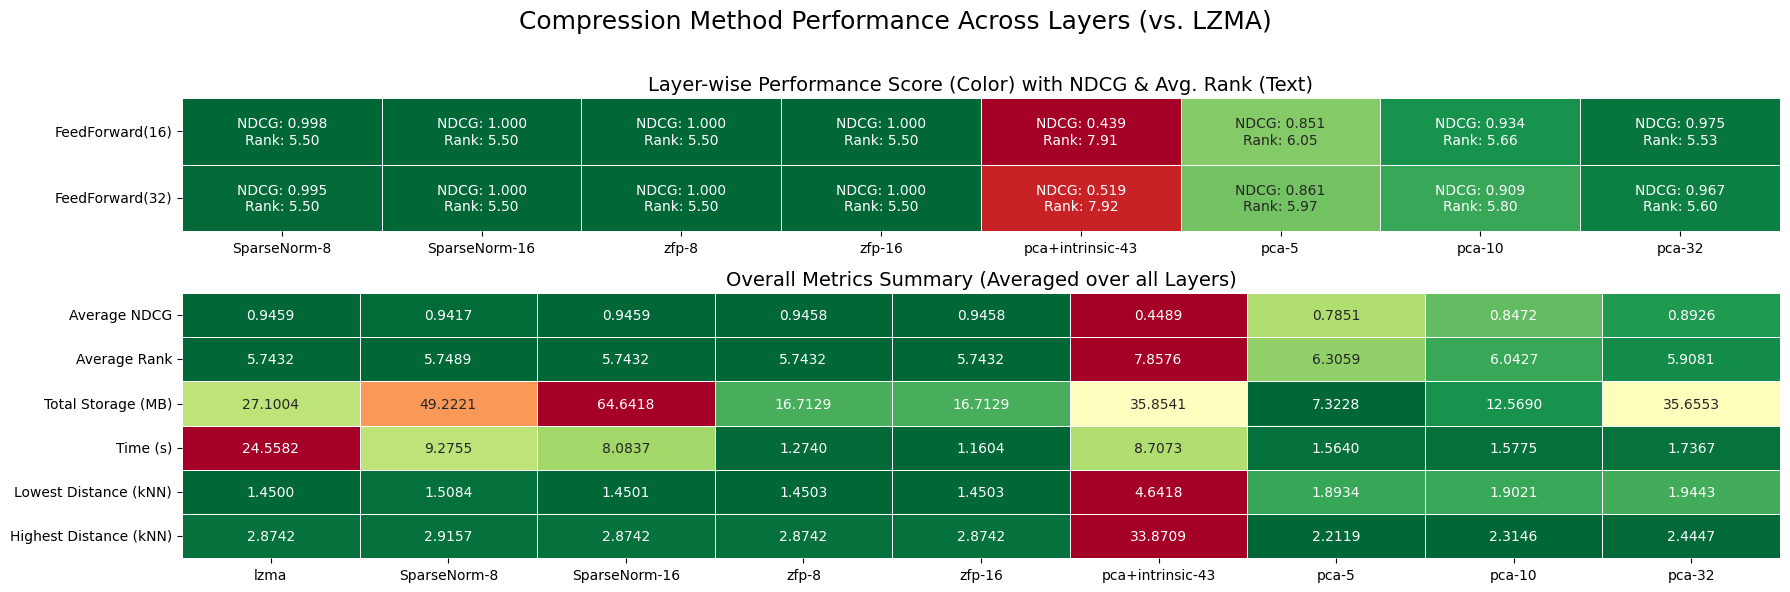

In [ ]:
# @title Feed-Forward Visualization { display-mode: "form" }

# --- Ranking Metric Calculation Functions (Unchanged) ---
def calculate_average_rank(ground_truth_indices, predicted_ranking, k=K_NEIGHBORS):
    if not ground_truth_indices or not predicted_ranking: return k
    rank_map = {sample_idx: rank + 1 for rank, sample_idx in enumerate(predicted_ranking)}
    return np.mean([rank_map.get(idx, len(predicted_ranking)) for idx in true_top_k]) if (true_top_k := ground_truth_indices[:k]) else k

def calculate_ndcg(ground_truth_indices, predicted_indices, k=K_NEIGHBORS):
    if not ground_truth_indices or not predicted_indices: return 0.0
    relevance_map = {idx: k - i for i, idx in enumerate(ground_truth_indices[:k])}
    dcg = sum(relevance_map.get(pred_idx, 0) / np.log2(i + 2) for i, pred_idx in enumerate(predicted_indices[:k]))
    idcg = sum(relevance_map.get(gt_idx, 0) / np.log2(i + 2) for i, gt_idx in enumerate(ground_truth_indices[:k]))
    return dcg / (idcg + 1e-9)

# --- Data Preparation ---
all_results = resultsArray
ground_truth_results = next((r for r in all_results if r["name"] == "lzma"), None)
if ground_truth_results:
    for layer_idx in relevantLayers:
        num_eval_samples = len(ground_truth_results["knn_per_layer"].get(layer_idx, []))
        for config in all_results:
            #if config["name"] == "lzma": continue
            ndcg_scores, avg_rank_scores = [], []
            for i in range(num_eval_samples):
                ideal_ranking = [item[0] for item in ground_truth_results["knn_per_layer"][layer_idx][i] if item[0] != -1]
                method_ranking = [item[0] for item in config["knn_per_layer"][layer_idx][i] if item[0] != -1]
                ndcg_scores.append(calculate_ndcg(ideal_ranking, method_ranking))
                avg_rank_scores.append(calculate_average_rank(ideal_ranking, method_ranking))
            config["ndcg"][layer_idx] = np.mean(ndcg_scores) if ndcg_scores else 0.0
            config["average_rank"][layer_idx] = np.mean(avg_rank_scores) if avg_rank_scores else K_NEIGHBORS

ff_layers = [idx for idx in relevantLayers if hidden_sizes[idx][0] == "FeedForward"]

# Rebuild DataFrames only with FF layers
ndcg_df = pd.DataFrame(
    {res['name']: [res['ndcg'].get(l, 0.0) for l in ff_layers] for res in all_results if res['name'] != 'lzma'},
    index=ff_layers
)
avg_rank_df = pd.DataFrame(
    {res['name']: [res['average_rank'].get(l, K_NEIGHBORS) for l in ff_layers] for res in all_results if res['name'] != 'lzma'},
    index=ff_layers
)

# --- Create a Unified Performance Score using Min-Max Normalization ---
min_ndcg, max_ndcg = ndcg_df.min().min(), ndcg_df.max().max()
normalized_ndcg_df = (ndcg_df - min_ndcg) / (max_ndcg - min_ndcg) if (max_ndcg - min_ndcg) > 0 else pd.DataFrame(1.0, index=ndcg_df.index, columns=ndcg_df.columns)

min_rank, max_rank = avg_rank_df.min().min(), avg_rank_df.max().max()
normalized_rank_df = (max_rank - avg_rank_df) / (max_rank - min_rank) if (max_rank - min_rank) > 0 else pd.DataFrame(1.0, index=avg_rank_df.index, columns=avg_rank_df.columns)

combined_score_df = (normalized_ndcg_df + normalized_rank_df) / 2

# Create custom labels for the combined heatmap
annot_labels = pd.DataFrame(index=ndcg_df.index, columns=ndcg_df.columns, dtype=str)
for col in ndcg_df.columns:
    for idx in ndcg_df.index:
        annot_labels.loc[idx, col] = f"NDCG: {ndcg_df.loc[idx, col]:.3f}\nRank: {avg_rank_df.loc[idx, col]:.2f}"

# Prepare the summary metrics table at the bottom
metrics_data = {
    'Average NDCG': [np.mean(list(res['ndcg'].values())) if res.get('ndcg') else 0 for res in all_results],
    'Average Rank': [np.mean(list(res['average_rank'].values())) if res.get('average_rank') else 0 for res in all_results],
    'Total Storage (MB)': [res['storage'] / (1024 * 1024) for res in all_results],
    'Time (s)': [res['time'] for res in all_results],
    'Lowest Distance (kNN)': [np.mean([d for v in res['lowest_distance'].values() for d in v if d != float('inf')]) if res.get('lowest_distance') else 0 for res in all_results],
    'Highest Distance (kNN)': [np.mean([d for v in res['highest_distance'].values() for d in v if d != 0.0]) if res.get('highest_distance') else 0 for res in all_results]
}
metrics_df = pd.DataFrame(metrics_data, index=[res['name'] for res in all_results]).T
metrics_annot = metrics_df.map(lambda x: f'{x:.4f}').values

layer_indices = ndcg_df.index
new_y_labels = [f"{hidden_sizes[idx][0]}({idx})" for idx in layer_indices]

plot_df = combined_score_df.loc[layer_indices].copy()
plot_annot_labels = annot_labels.loc[layer_indices].copy()

plot_df.index = new_y_labels
plot_annot_labels.index = new_y_labels

# --- Plotting with Intuitive Colormap ---
fig, axes = plt.subplots(2, 1, figsize=(18, 6), gridspec_kw={'height_ratios': [2, 4]})
fig.suptitle('Compression Method Performance Across Layers (vs. LZMA)', fontsize=18)

# --- Top Heatmap for Combined Score ---
sns.heatmap(
    plot_df,
    ax=axes[0],
    annot=annot_labels,
    fmt="s",
    cmap="RdYlGn",  # Use intuitive Red-Yellow-Green colormap
    linewidths=.5,
    vmin=0,
    vmax=1,
    cbar=False#_kws={'label': 'Combined Performance (Higher is Better)'}
)
axes[0].set_title('Layer-wise Performance Score (Color) with NDCG & Avg. Rank (Text)', fontsize=14)
axes[0].set_ylabel('', fontsize=12)
axes[0].set_xlabel('')

# --- Bottom Heatmap for Overall Metrics ---
# Normalize the summary data to apply a consistent and intuitive colormap
summary_norm_df = metrics_df.copy()
for metric in summary_norm_df.index:
    min_val, max_val = summary_norm_df.loc[metric].min(), summary_norm_df.loc[metric].max()
    if (max_val - min_val) > 1e-9:
        summary_norm_df.loc[metric] = (summary_norm_df.loc[metric] - min_val) / (max_val - min_val)
    else:
        summary_norm_df.loc[metric] = 0.5

# Invert colors for "lower-is-better" metrics so that green is always good
metrics_to_invert = ['Total Storage (MB)', 'Average Rank', 'Time (s)', 'Lowest Distance (kNN)', 'Highest Distance (kNN)']
for metric in metrics_to_invert:
    if metric in summary_norm_df.index:
        summary_norm_df.loc[metric] = 1 - summary_norm_df.loc[metric]

sns.heatmap(
    summary_norm_df,
    ax=axes[1],
    annot=metrics_annot, # Use original, un-normalized values for the text
    fmt='s',
    cmap="RdYlGn",
    cbar=False,
    linewidths=.5
)
axes[1].set_title('Overall Metrics Summary (Averaged over all Layers)', fontsize=14)
axes[1].set_xlabel('', fontsize=12)
axes[1].set_ylabel('')
plt.setp(axes[1].get_xticklabels(), ha='center')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

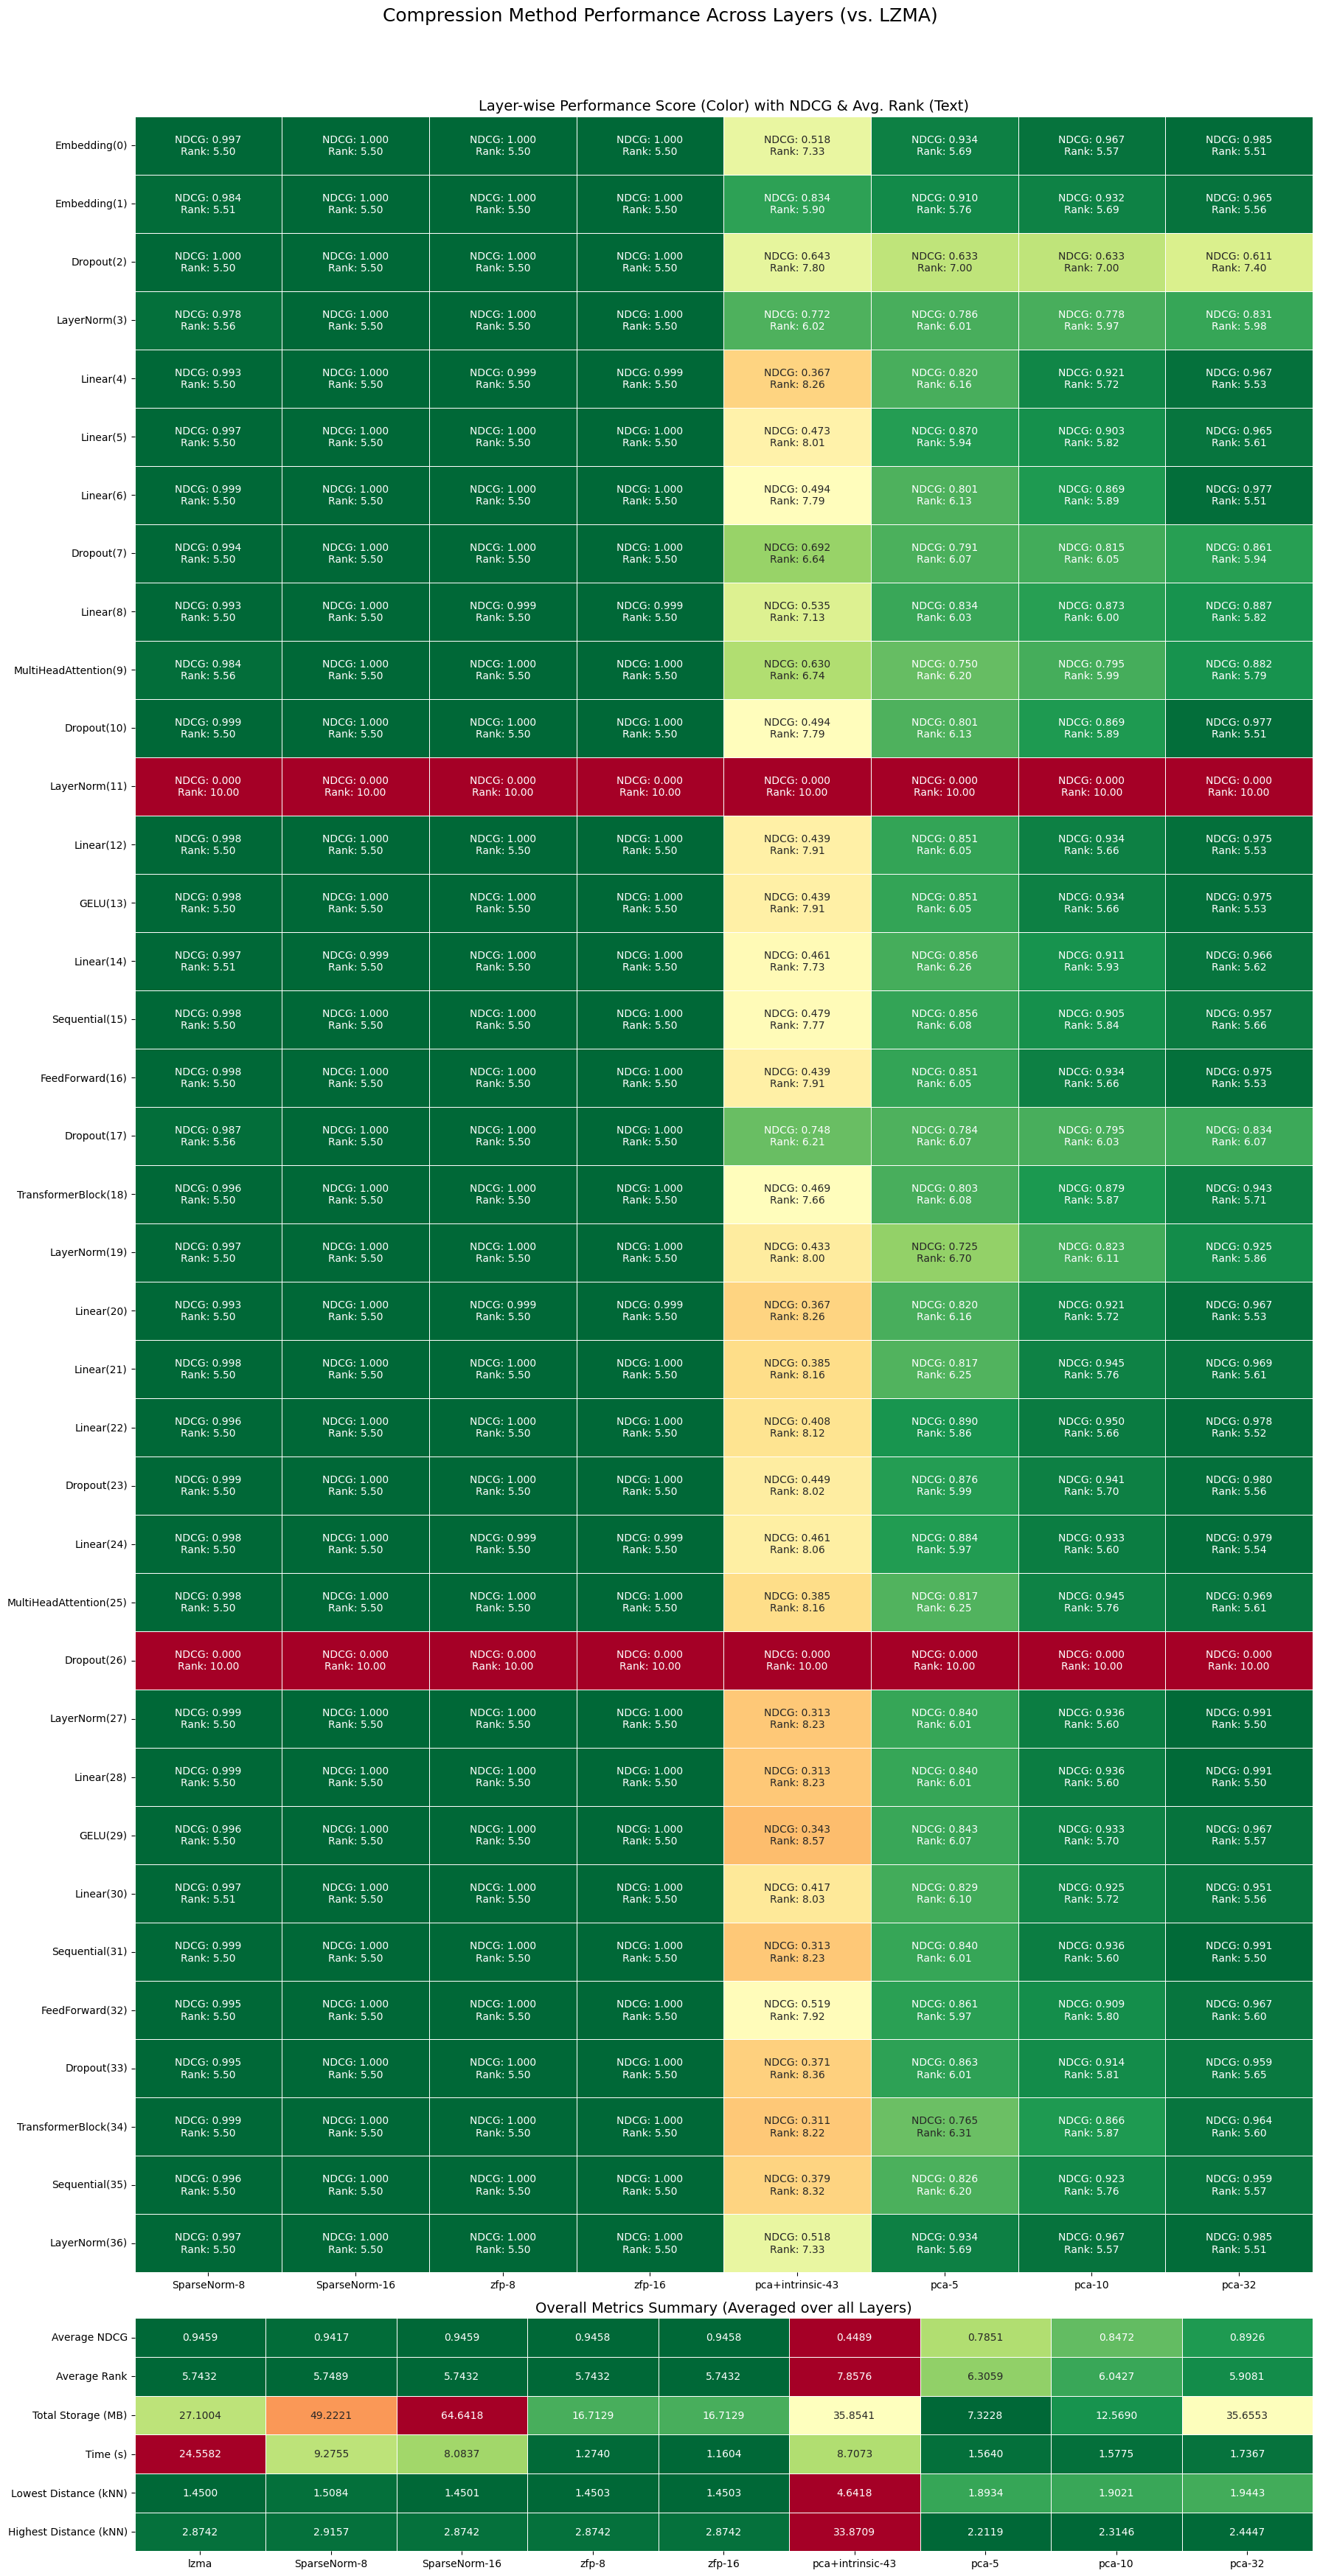

In [ ]:
# @title All Layer Visualization { display-mode: "form" }

# --- Ranking Metric Calculation Functions (Unchanged) ---
def calculate_average_rank(ground_truth_indices, predicted_ranking, k=K_NEIGHBORS):
    if not ground_truth_indices or not predicted_ranking: return k
    rank_map = {sample_idx: rank + 1 for rank, sample_idx in enumerate(predicted_ranking)}
    return np.mean([rank_map.get(idx, len(predicted_ranking)) for idx in true_top_k]) if (true_top_k := ground_truth_indices[:k]) else k

def calculate_ndcg(ground_truth_indices, predicted_indices, k=K_NEIGHBORS):
    if not ground_truth_indices or not predicted_indices: return 0.0
    relevance_map = {idx: k - i for i, idx in enumerate(ground_truth_indices[:k])}
    dcg = sum(relevance_map.get(pred_idx, 0) / np.log2(i + 2) for i, pred_idx in enumerate(predicted_indices[:k]))
    idcg = sum(relevance_map.get(gt_idx, 0) / np.log2(i + 2) for i, gt_idx in enumerate(ground_truth_indices[:k]))
    return dcg / (idcg + 1e-9)

# --- Data Preparation ---
all_results = resultsArray
ground_truth_results = next((r for r in all_results if r["name"] == "lzma"), None)
if ground_truth_results:
    for layer_idx in relevantLayers:
        num_eval_samples = len(ground_truth_results["knn_per_layer"].get(layer_idx, []))
        for config in all_results:
            #if config["name"] == "lzma": continue
            ndcg_scores, avg_rank_scores = [], []
            for i in range(num_eval_samples):
                ideal_ranking = [item[0] for item in ground_truth_results["knn_per_layer"][layer_idx][i] if item[0] != -1]
                method_ranking = [item[0] for item in config["knn_per_layer"][layer_idx][i] if item[0] != -1]
                ndcg_scores.append(calculate_ndcg(ideal_ranking, method_ranking))
                avg_rank_scores.append(calculate_average_rank(ideal_ranking, method_ranking))
            config["ndcg"][layer_idx] = np.mean(ndcg_scores) if ndcg_scores else 0.0
            config["average_rank"][layer_idx] = np.mean(avg_rank_scores) if avg_rank_scores else K_NEIGHBORS

ndcg_df = pd.DataFrame({res['name']: [res['ndcg'].get(l, 0.0) for l in relevantLayers] for res in all_results if res['name'] != 'lzma'}, index=relevantLayers)
avg_rank_df = pd.DataFrame({res['name']: [res['average_rank'].get(l, K_NEIGHBORS) for l in relevantLayers] for res in all_results if res['name'] != 'lzma'}, index=relevantLayers)

# --- Create a Unified Performance Score using Min-Max Normalization ---
min_ndcg, max_ndcg = ndcg_df.min().min(), ndcg_df.max().max()
normalized_ndcg_df = (ndcg_df - min_ndcg) / (max_ndcg - min_ndcg) if (max_ndcg - min_ndcg) > 0 else pd.DataFrame(1.0, index=ndcg_df.index, columns=ndcg_df.columns)

min_rank, max_rank = avg_rank_df.min().min(), avg_rank_df.max().max()
normalized_rank_df = (max_rank - avg_rank_df) / (max_rank - min_rank) if (max_rank - min_rank) > 0 else pd.DataFrame(1.0, index=avg_rank_df.index, columns=avg_rank_df.columns)

combined_score_df = (normalized_ndcg_df + normalized_rank_df) / 2

# Create custom labels for the combined heatmap
annot_labels = pd.DataFrame(index=ndcg_df.index, columns=ndcg_df.columns, dtype=str)
for col in ndcg_df.columns:
    for idx in ndcg_df.index:
        annot_labels.loc[idx, col] = f"NDCG: {ndcg_df.loc[idx, col]:.3f}\nRank: {avg_rank_df.loc[idx, col]:.2f}"

# Prepare the summary metrics table at the bottom
metrics_data = {
    'Average NDCG': [np.mean(list(res['ndcg'].values())) if res.get('ndcg') else 0 for res in all_results],
    'Average Rank': [np.mean(list(res['average_rank'].values())) if res.get('average_rank') else 0 for res in all_results],
    'Total Storage (MB)': [res['storage'] / (1024 * 1024) for res in all_results],
    'Time (s)': [res['time'] for res in all_results],
    'Lowest Distance (kNN)': [np.mean([d for v in res['lowest_distance'].values() for d in v if d != float('inf')]) if res.get('lowest_distance') else 0 for res in all_results],
    'Highest Distance (kNN)': [np.mean([d for v in res['highest_distance'].values() for d in v if d != 0.0]) if res.get('highest_distance') else 0 for res in all_results]
}
metrics_df = pd.DataFrame(metrics_data, index=[res['name'] for res in all_results]).T
metrics_annot = metrics_df.map(lambda x: f'{x:.4f}').values

#print(hidden_sizes)
layer_indices = combined_score_df.index
new_y_labels = [f"{hidden_sizes[idx][0]}({idx})" for idx in layer_indices]

# --- Update the DataFrames with the new labels ---
# It's best practice to create copies for plotting
plot_df = combined_score_df.copy()
plot_annot_labels = annot_labels.copy()

# Set the index of both DataFrames to be the new string labels
plot_df.index = new_y_labels
plot_annot_labels.index = new_y_labels

# --- Plotting with Intuitive Colormap ---
fig, axes = plt.subplots(2, 1, figsize=(18, len(relevantLayers) * 0.8 + 6), gridspec_kw={'height_ratios': [len(relevantLayers), 4]})
fig.suptitle('Compression Method Performance Across Layers (vs. LZMA)', fontsize=18)

# --- Top Heatmap for Combined Score ---
sns.heatmap(
    plot_df,
    ax=axes[0],
    annot=annot_labels,
    fmt="s",
    cmap="RdYlGn",  # Use intuitive Red-Yellow-Green colormap
    linewidths=.5,
    vmin=0,
    vmax=1,
    cbar=False#_kws={'label': 'Combined Performance (Higher is Better)'}
)
axes[0].set_title('Layer-wise Performance Score (Color) with NDCG & Avg. Rank (Text)', fontsize=14)
axes[0].set_ylabel('', fontsize=12)
axes[0].set_xlabel('')

# --- Bottom Heatmap for Overall Metrics ---
# Normalize the summary data to apply a consistent and intuitive colormap
summary_norm_df = metrics_df.copy()
for metric in summary_norm_df.index:
    min_val, max_val = summary_norm_df.loc[metric].min(), summary_norm_df.loc[metric].max()
    if (max_val - min_val) > 1e-9:
        summary_norm_df.loc[metric] = (summary_norm_df.loc[metric] - min_val) / (max_val - min_val)
    else:
        summary_norm_df.loc[metric] = 0.5

# Invert colors for "lower-is-better" metrics so that green is always good
metrics_to_invert = ['Total Storage (MB)', 'Average Rank', 'Time (s)', 'Lowest Distance (kNN)', 'Highest Distance (kNN)']
for metric in metrics_to_invert:
    if metric in summary_norm_df.index:
        summary_norm_df.loc[metric] = 1 - summary_norm_df.loc[metric]

sns.heatmap(
    summary_norm_df,
    ax=axes[1],
    annot=metrics_annot, # Use original, un-normalized values for the text
    fmt='s',
    cmap="RdYlGn",
    cbar=False,
    linewidths=.5
)
axes[1].set_title('Overall Metrics Summary (Averaged over all Layers)', fontsize=14)
axes[1].set_xlabel('', fontsize=12)
axes[1].set_ylabel('')
plt.setp(axes[1].get_xticklabels(), ha='center')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()